In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df= pd.read_csv('Crop Production data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df['Production'] = df['Production'].fillna(df['Production'].mean())

In [5]:
df = pd.get_dummies(df,columns=['State_Name','District_Name','Season'])

In [6]:
# SCALE NUMERICAL FEATURES
scaler= MinMaxScaler()
df[['Area','Crop_Year']]= scaler.fit_transform(df[['Area','Crop_Year']])

In [7]:
print(df.head())

   Crop_Year                 Crop          Area  Production  \
0   0.166667             Arecanut  1.461475e-04      2000.0   
1   0.166667  Other Kharif pulses  2.284356e-07         1.0   
2   0.166667                 Rice  1.188331e-05       321.0   
3   0.166667               Banana  2.050792e-05       641.0   
4   0.166667            Cashewnut  8.391044e-05       165.0   

   State_Name_Andaman and Nicobar Islands  State_Name_Andhra Pradesh  \
0                                       1                          0   
1                                       1                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   

   State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
0                             0                 0                 0   
1                             0               

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
df = pd.read_csv('Crop Production data.csv')

In [10]:
# drop rows with missing values in the target variable
df= df.dropna(subset=['Production'])

In [11]:
x=df.drop(columns=['Production'])
y= df['Production']

In [12]:
x_encoded=pd.get_dummies(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y, test_size=0.2, random_state= 42)

In [14]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [15]:
linear_reg_prediction = linear_reg_model.predict(x_test)


In [16]:
linear_reg_mae= mean_absolute_error(y_test,linear_reg_prediction)
linear_reg_mse= mean_squared_error(y_test,linear_reg_prediction)
linear_reg_r2= r2_score(y_test,linear_reg_prediction)

In [17]:
print("Linear  regression metrics:")
print("mean absolute error(MAE):", linear_reg_mae)
print("mean squared error (MSE):", linear_reg_mse)
print("r_squred (R2)", linear_reg_r2)

Linear  regression metrics:
mean absolute error(MAE): 1926724.745861352
mean squared error (MSE): 330386814616052.7
r_squred (R2) 0.17883228777143145


#### Datapreparation


In [18]:
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [19]:
missing_values_before= df.isnull().sum()
print('missing values beforre handling:',missing_values_before)
df['Production'] = df['Production'].fillna(df['Production'].mean())

missing values beforre handling: State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [20]:
missing_values_after =df.isnull().sum()
print('missing values after handling:',missing_values_after)

missing values after handling: State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


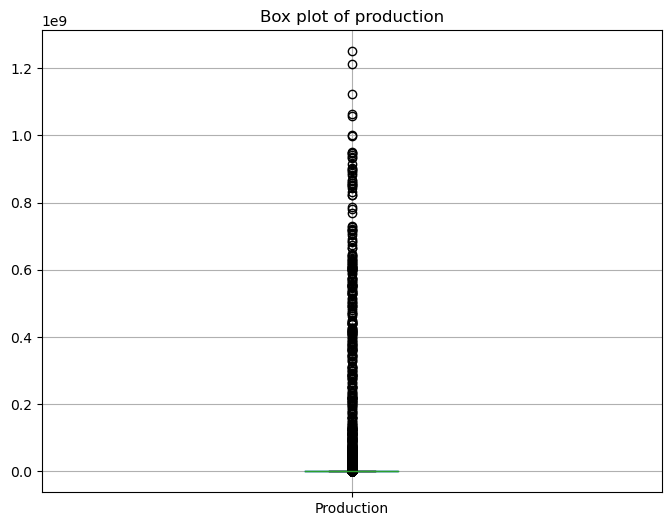

In [21]:
plt.figure(figsize=(8,6))
df.boxplot(column=['Production'])
plt.title('Box plot of production')
plt.show()

In [22]:
df['Production']= winsorize(df['Production'], limits= [0.05,0.05])

In [23]:
df['Month'] = pd.to_datetime(df['Crop_Year'],format='%Y').dt.month
print("Unique months in hte dataset:", df['Month'].unique())

Unique months in hte dataset: [1]


In [24]:
df['Crop_Year']=pd.to_datetime(df['Crop_Year'],format='%Y')


In [25]:
x=df.drop(columns=['Production'])
y= df['Production']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print('training set shape:', x_train.shape, y_train.shape)
print('testing set shape:', x_test.shape,y_test.shape)

training set shape: (193888, 7) (193888,)
testing set shape: (48473, 7) (48473,)


### EDA

In [27]:
df= pd.read_csv('Crop Production data.csv')

In [28]:
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [29]:
print(df.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


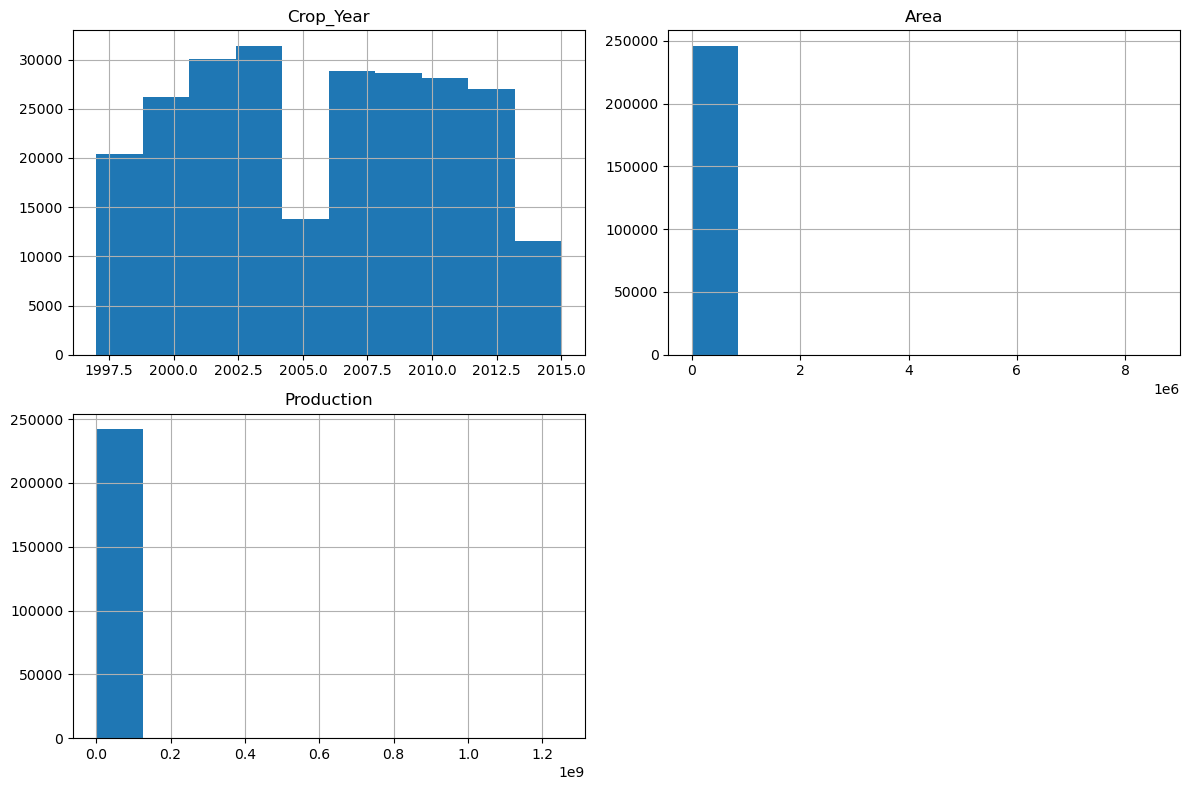

In [9]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

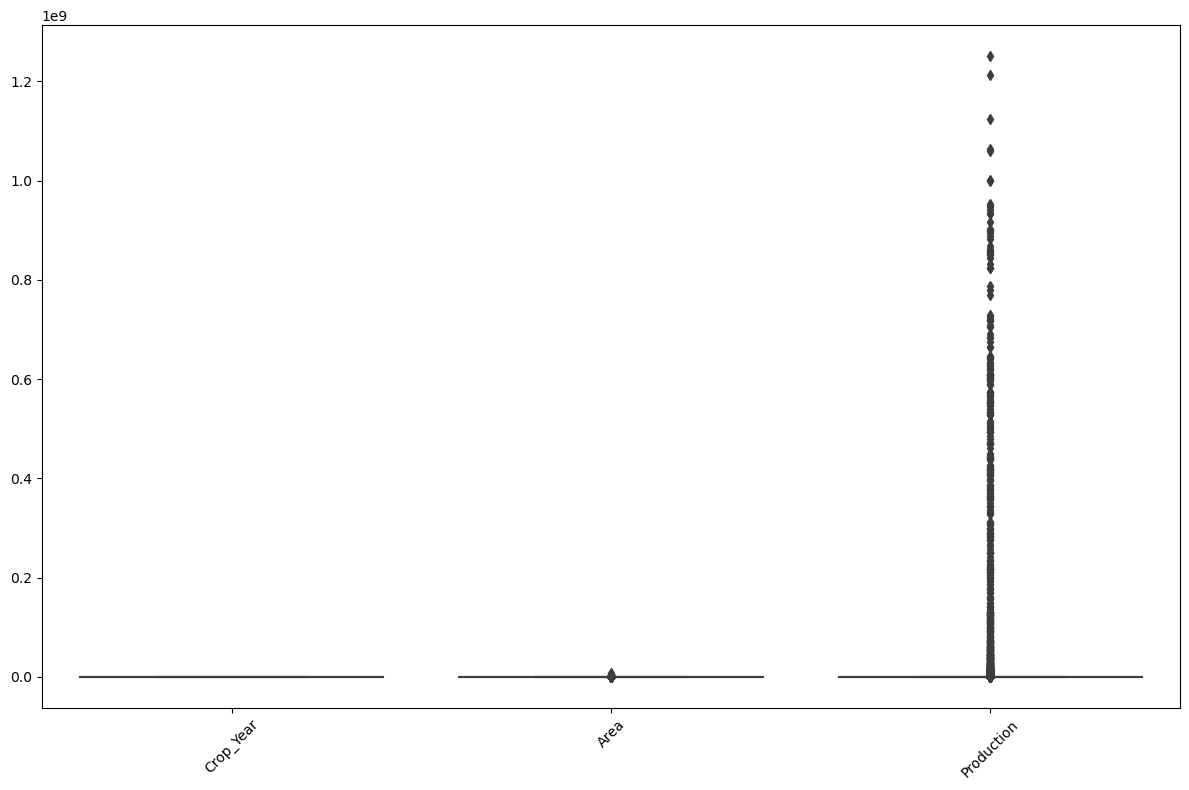

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

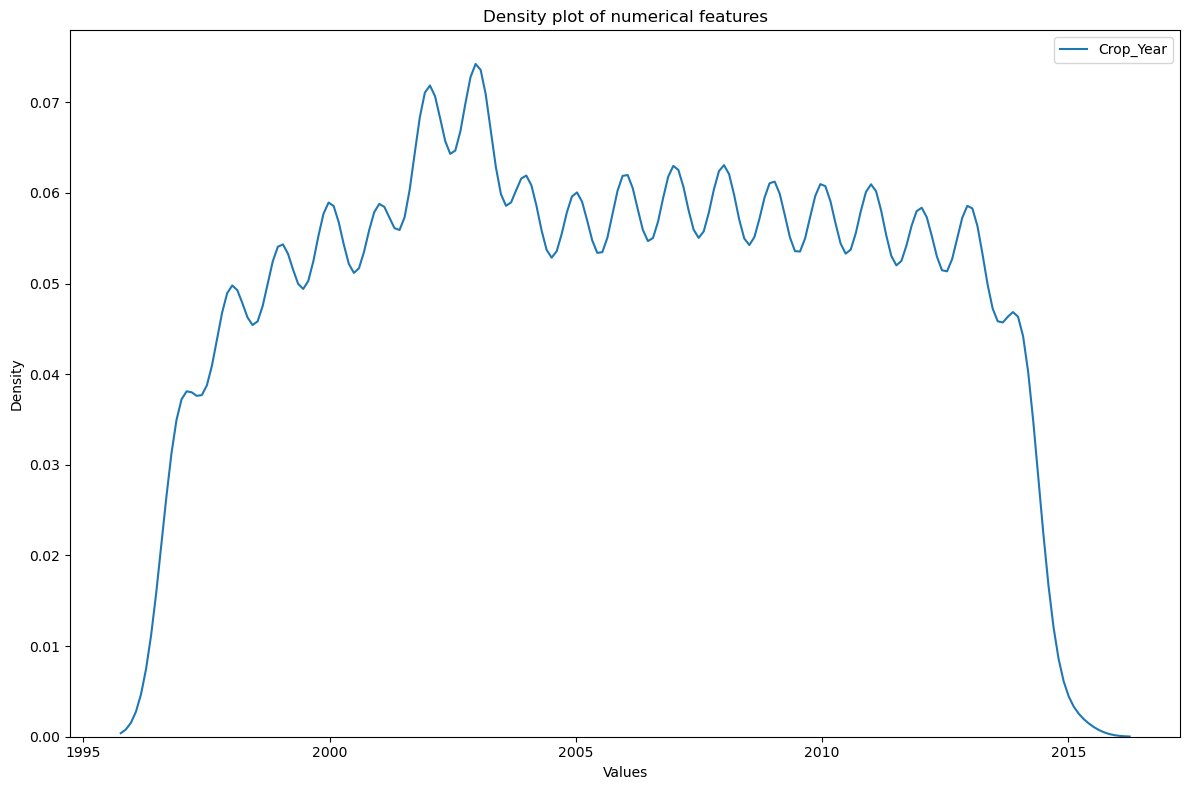

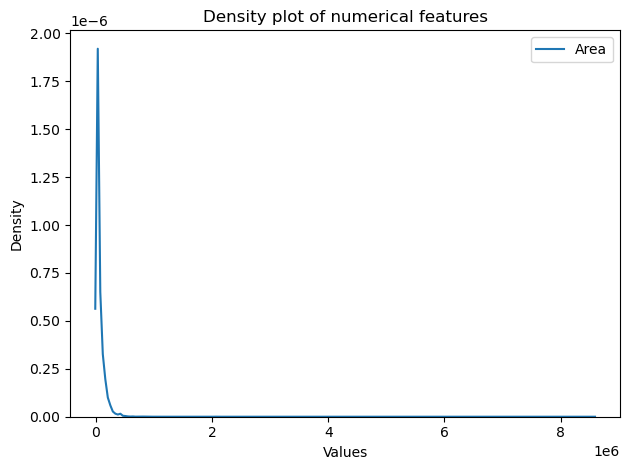

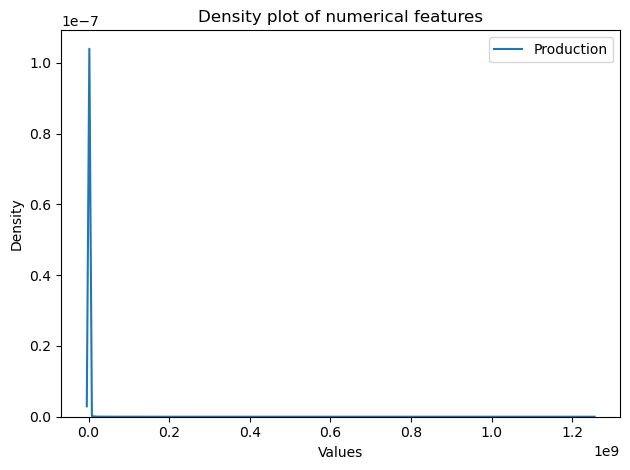

In [11]:
plt.figure(figsize=(12,8))
for column in df.select_dtypes(include='number').columns:
    sns.kdeplot(data=df[column],label=column)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Density plot of numerical features')
    plt.legend()
    plt.tight_layout()
    plt.show()

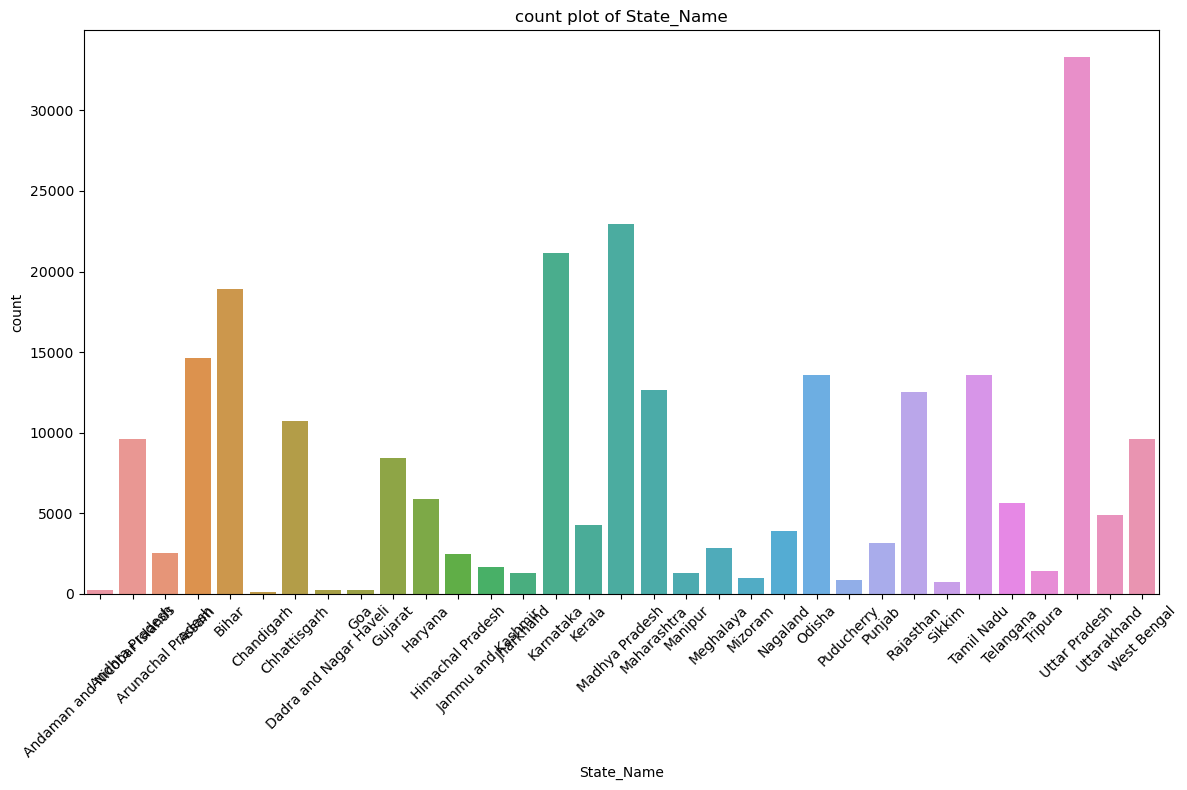

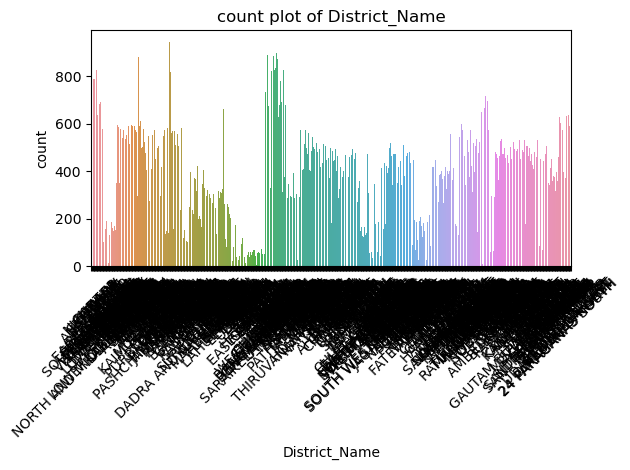

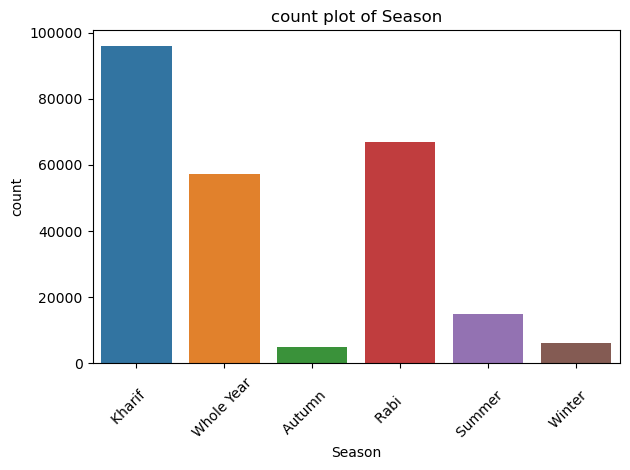

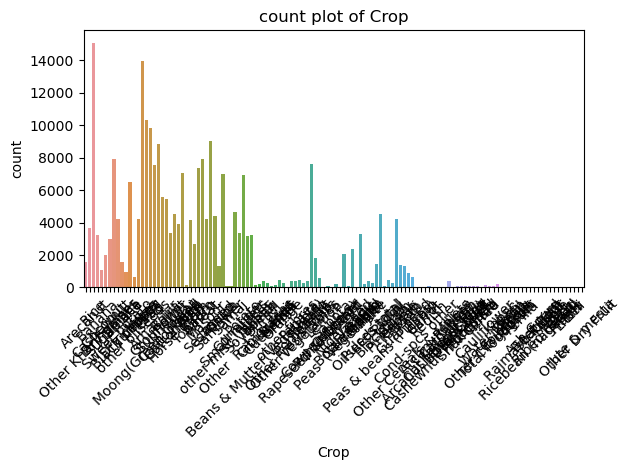

In [12]:
plt.figure(figsize=(12,8))
for column in df.select_dtypes(include='object').columns:
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=45)
    plt.title(f'count plot of {column}')
    plt.tight_layout()
    plt.show()

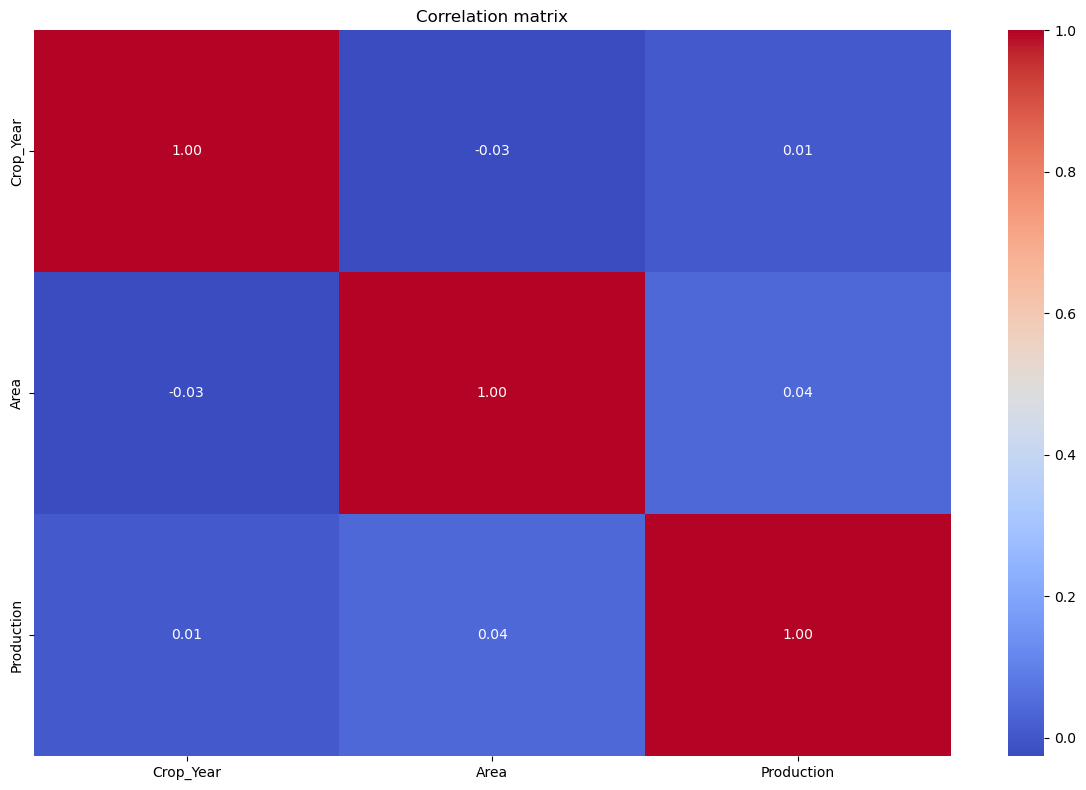

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [15]:
print('dataset info:')
print(df.info())

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [16]:
print('\nfirst few rows of the dataset:')
print(df.head())


first few rows of the dataset:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [17]:
print('\nnumber of missing values in each column:')
print(df.isnull().sum())


number of missing values in each column:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [18]:
print('\ndescriptive statistics for numerical columns:')
print(df.describe())


descriptive statistics for numerical columns:
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


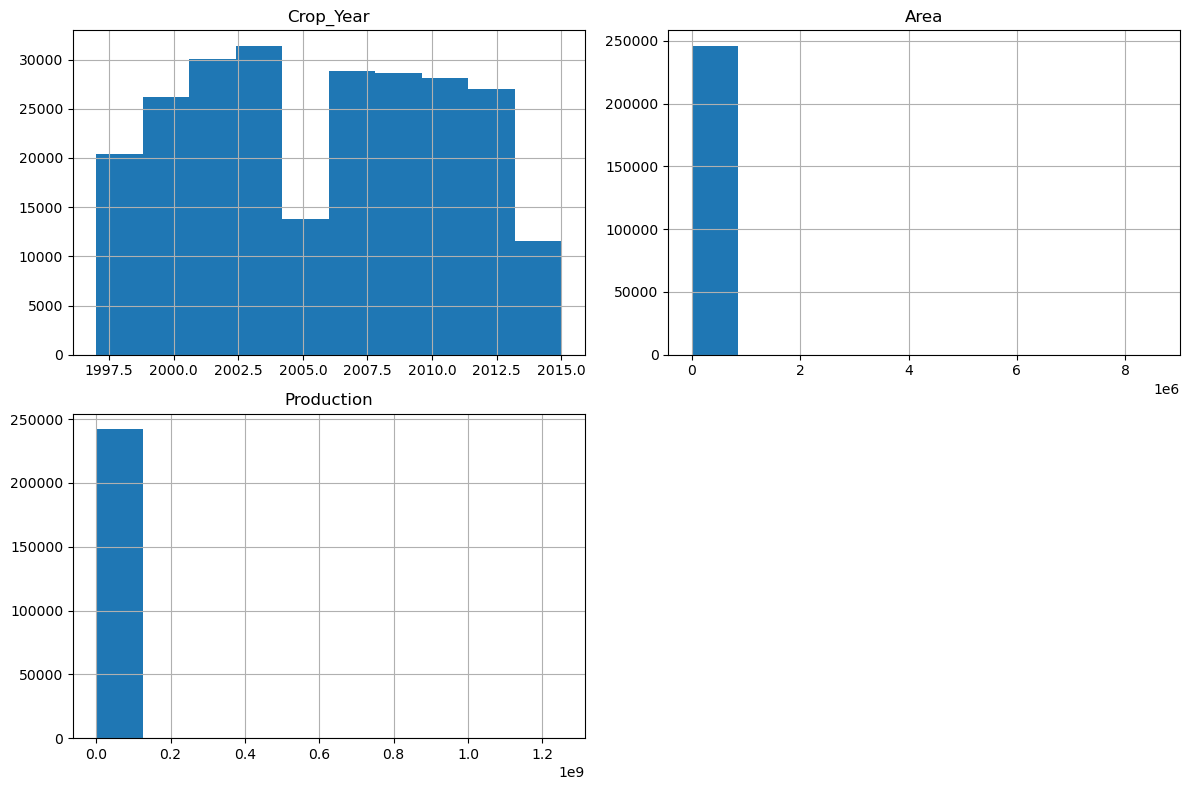

In [19]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [20]:
print('\nunique values in categorical column:')
for col in df.select_dtypes(include='object'):
    print(f"{col}:{df[col].unique()}")


unique values in categorical column:
State_Name:['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
District_Name:['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIG

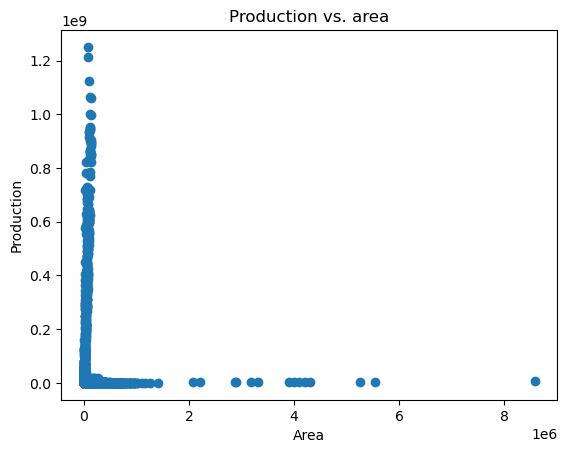

In [21]:
plt.scatter(df['Area'],df['Production'])
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Production vs. area')
plt.show()

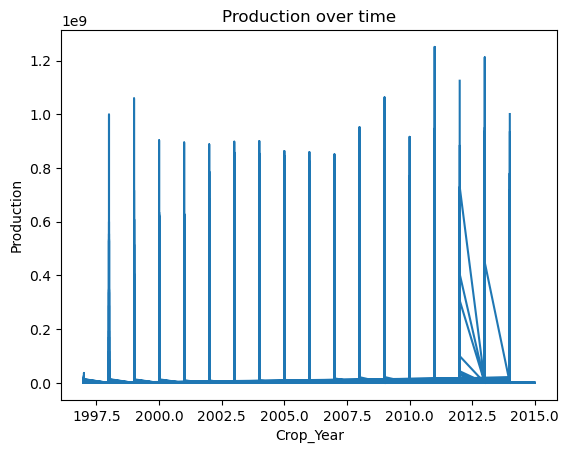

In [22]:
df['Year']= pd.to_datetime(df['Crop_Year'],format='%Y')
plt.plot(df['Crop_Year'],df['Production'])
plt.xlabel('Crop_Year')
plt.ylabel('Production')
plt.title('Production over time')
plt.show()

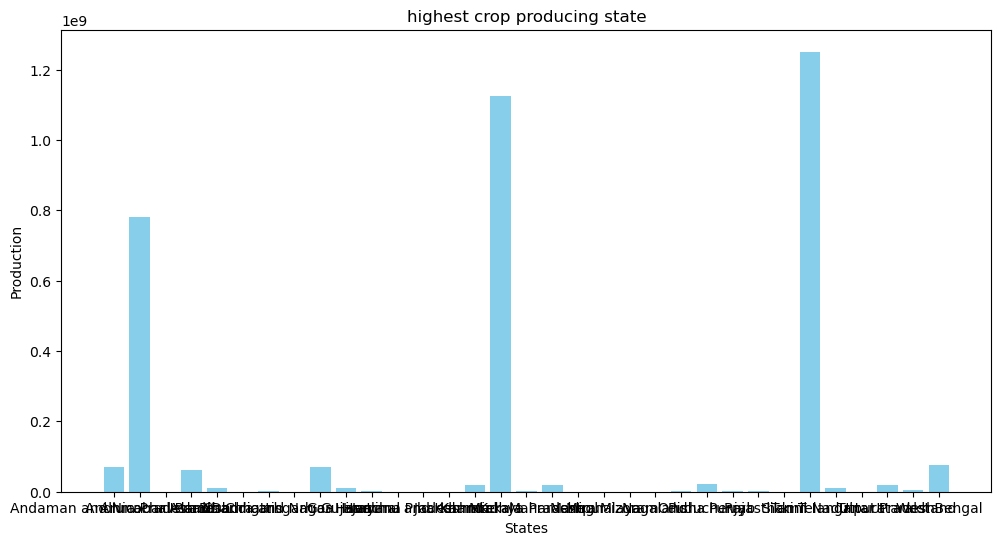

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(df['State_Name'], df['Production'], color='skyblue')
plt.title('highest crop producing state')
plt.xlabel('States')
plt.ylabel('Production')
plt.show()